# library

In [32]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# import data

In [12]:
lien_csv = "https://raw.githubusercontent.com/pierrebeguin/Master_2_defi_2/main/data_defi_2.csv"
response = requests.get(lien_csv)
data = pd.read_csv(StringIO(response.text), sep=";")

# supprimer la 1er ligne
data.columns = data.iloc[0]
data = data.iloc[1:].reset_index(drop=True)

# Suppression des lignes où la colonne 'Avis.Pharmaceutique' est vide
data = data.dropna(subset=['Avis.Pharmaceutique'])

# Créer les colonnes IP_1 et IP_2
data['PLT'] = pd.to_numeric(data['PLT'], errors='coerce')
data['IP_1'] = np.where(data['PLT'].isin([4.1, 4.2, 5.1, 5.2, 5.3, 6.3, 6.4]), 1, 0)
data['IP_2'] = np.floor(data['PLT']).astype(int)

display(data.head())

,Libellé.Prescription,Avis.Pharmaceutique,PLT,IP_1,IP_2
0,"CONTRAMAL 100 MG/ML, GOUTTES BUV (TRAMADOL)",30/12/16 pas d'indication,5.3,1,5
1,"IMOVANE 7.5 MG, CPR SÉCABLE (ZOPICLONE)","22/12/16 recommandé -> IMOVANE 3,75MG CP, 1 au...",4.1,1,4
2,"COLCHICINE 1 MG, CPR SÉCABLE (COLCHICINE)","au vue de la DFG, il est recommandé d'administ...",4.1,1,4
3,"PANTOPRAZOLE 40 MG, CPR GASTRO-RÉSISTANT (EUPA...",Dose curative et absence d'ATCD gastrique retr...,4.1,1,4
4,VANCOMYCINE 500 mg 1x/j,posologie infraT veuillez réévaluer la posolog...,3.1,0,3


In [16]:
data.groupby('IP_1').size()
#data.shape

IP_1
0    18613
1     4528
dtype: int64

# Préparation_1

In [18]:
# définir X et y
X = data['Avis.Pharmaceutique']
y = data['IP_1']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

# Paramètres de tokenisation
max_words = 10000
max_len = 100

# Initialiser le tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convertir les textes en séquences de tokens
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Ajouter du padding pour uniformiser la longueur des séquences
X_train = pad_sequences(X_train, padding='post')
X_test = pad_sequences(X_test, padding='post')

# Modèle_1

In [20]:
# Création du modèle de réseau de neurones
model_1 = Sequential([
    Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\mamad\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7986 - loss: 0.5004 - val_accuracy: 0.8127 - val_loss: 0.3882
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8251 - loss: 0.3768 - val_accuracy: 0.8743 - val_loss: 0.2941
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8741 - loss: 0.2929 - val_accuracy: 0.8941 - val_loss: 0.2567
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8941 - loss: 0.2531 - val_accuracy: 0.9000 - val_loss: 0.2375
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9047 - loss: 0.2297 - val_accuracy: 0.9093 - val_loss: 0.2191
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9142 - loss: 0.2151 - val_accuracy: 0.9078 - val_loss: 0.2307
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9253 - loss: 0.1920 - val_accuracy: 0.9145 - val_loss: 0.2092
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9292 - loss: 0.1814 - val_accuracy: 0.9216 - val_

# Evaluation_1

In [22]:
# Prédictions sur les données de test
y_pred_proba = model_1.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32").flatten()

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print("\nMatrice de confusion :\n", conf_matrix)
print("\nClassification Report :\n", class_report)

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
Accuracy : 0.92
Precision: 0.79
Recall   : 0.80
F1 Score : 0.80

Matrice de confusion :
 [[3535  188]
 [ 177  729]]

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3723
           1       0.79      0.80      0.80       906

    accuracy                           0.92      4629
   macro avg       0.87      0.88      0.88      4629
weighted avg       0.92      0.92      0.92      4629



145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


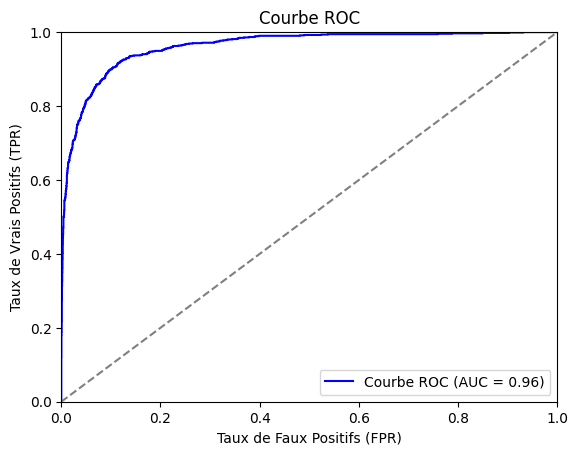

In [8]:
y_pred_proba = model_1.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# Préparation_2

In [24]:
# définir X et y
X = data['Avis.Pharmaceutique']
y = data['IP_2']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

# Paramètres de tokenisation
max_words = 10000
max_len = 100

# Initialiser le tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convertir les textes en séquences de tokens
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Ajouter du padding pour uniformiser la longueur des séquences
X_train = pad_sequences(X_train, padding='post')
X_test = pad_sequences(X_test, padding='post')

# Modèle_2

In [26]:
# Création du modèle de réseau de neurones
model_2 = Sequential()
model_2.add(Embedding(input_dim=max_words, output_dim=16, input_length=max_len))
model_2.add(LSTM(64, return_sequences=True))
model_2.add(GlobalAveragePooling1D())
model_2.add(Dense(12, activation='softmax'))

# Compilation du modèle
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\mamad\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


579/579 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5035 - loss: 1.6294 - val_accuracy: 0.6129 - val_loss: 1.1470
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6323 - loss: 1.0961 - val_accuracy: 0.6124 - val_loss: 1.1334
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6754 - loss: 0.9935 - val_accuracy: 0.6734 - val_loss: 1.0217
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7153 - loss: 0.8662 - val_accuracy: 0.7148 - val_loss: 0.8884
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7762 - loss: 0.6852 - val_accuracy: 0.7192 - val_loss: 0.8507
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8092 - loss: 0.5875 - val_accuracy: 0.7457 - val_loss: 0.7631
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8223 - loss: 0.5325 - val_accuracy: 0.7425 - val_loss: 0.7853
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8549 - loss: 0.4580 - val_accuracy: 0.

# Evaluation_2

In [28]:
# Prédire sur l'ensemble de test
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Évaluation détaillée
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.89      0.88      2253
           2       0.63      0.67      0.65       151
           3       0.34      0.17      0.23       194
           4       0.75      0.76      0.76       613
           5       0.65      0.48      0.55       166
           6       0.72      0.86      0.79       193
           7       0.00      0.00      0.00         2
           8       0.77      0.71      0.74       589
           9       0.00      0.00      0.00         4
          10       0.50      0.53      0.52       148
          11       0.46      0.60      0.52       316

    accuracy                           0.76      4629
   macro avg       0.52      0.52      0.51      4629
weighted avg       0.76      0.76      0.76      4629



C:\Users\mamad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mamad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mamad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


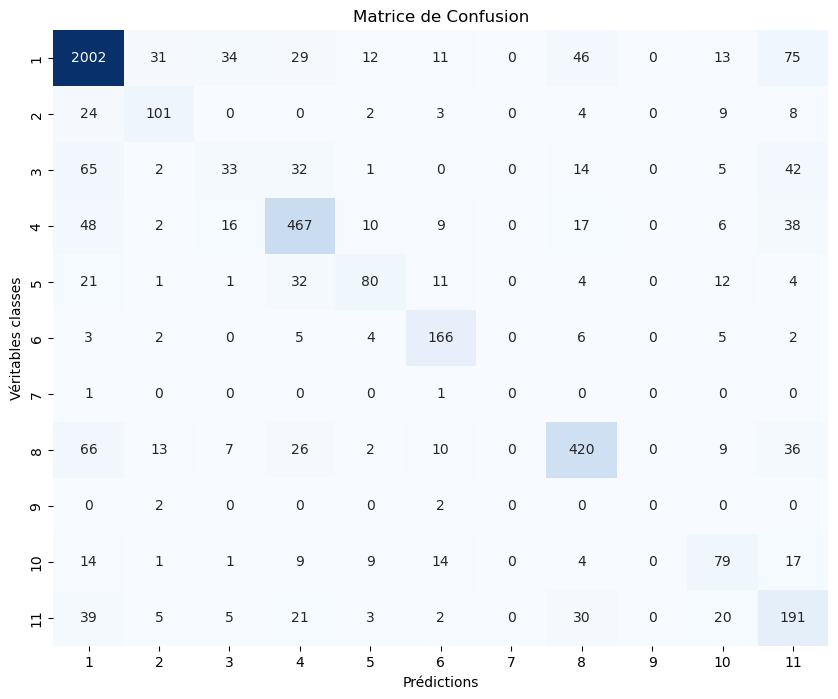

In [30]:
# Matrice de Confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(1, 12), yticklabels=range(1, 12))
plt.xlabel("Prédictions")
plt.ylabel("Véritables classes")
plt.title("Matrice de Confusion")
plt.show()

# data_test

In [32]:
lien_csv_test = "https://raw.githubusercontent.com/pierrebeguin/Master_2_defi_2/main/valid_set.csv"
response_test = requests.get(lien_csv_test)
data_test = pd.read_csv(StringIO(response_test.text), sep=";")

# Suppression des lignes où la colonne 'avis' est vide
data_test = data_test.dropna(subset=['Avis.Pharmaceutique'])

In [74]:
#data_test.head()

In [63]:
### Préparation

train = data_test['Avis.Pharmaceutique']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)
train = tokenizer.texts_to_sequences(train)
train = pad_sequences(train, padding='post')

### Model

y_pred_1 = model_1.predict(train)
y_pred_1 = (y_pred_1 > 0.5).astype("int32").flatten()

y_pred_2 = model_2.predict(train)
y_pred_2 = np.argmax(y_pred_2, axis=1)

### Résultat

y_pred_1 = pd.Series(y_pred_1, name="Statue")
y_pred_2 = pd.Series(y_pred_2, name="Classe")
result = pd.concat([data_test, y_pred_1, y_pred_2], axis=1)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [73]:
display(result.head())
display(result.groupby('Statue').size())
display(result.groupby('Classe').size())

,Libellé.Prescription,Avis.Pharmaceutique,Statue,Classe
0,perf NEFOPAM 60 mg (Acupan) + 1.25 DROPERIDOL ...,ASSOCIATION CONTRE INDIQUEE : SEROPLEX 20 MG C...,0.0,10.0
1,"LAMALINE, GÉLULE",Propose arrêt pendant hospitalisation ou DOLIP...,0.0,1.0
2,"XYZALL 5 MG, CPR","Non référencé aux HUS, propose CETIRIZINE 10MG...",0.0,1.0
3,AMOXICILLINE + A.CLAVULANIQUE 1g x4/j (Augmentin),Il est recommandé de réduire la posologie en a...,0.0,1.0
4,"FELODIPINE LP 5 MG SANDOZ, CPR À LIBÉRATION PR...","Non référencé aux HUS, Substitué par amlodipin...",0.0,1.0


,0
Statue,
0.0,3929
1.0,145


,0
Classe,
1.0,2149
2.0,141
3.0,177
4.0,478
5.0,143
6.0,34
8.0,446
10.0,80
11.0,426


In [76]:
# Sauvegarder le DataFrame dans un fichier Excel
result.to_excel('resultat_defi_2.xlsx', index=False)

# Télécharger le fichier Excel
files.download('resultat_defi_2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>